In [1]:
import pandas as pd

# Loading the dataset
netflix_data = pd.read_csv('netflix_titles.csv')

# Check the first few rows
print(netflix_data.head())

# Get information about the dataset
print(netflix_data.info())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [2]:
# Check the distribution of content types (movies vs. TV shows)
print(netflix_data['type'].value_counts())

# Examine the release year distribution
print(netflix_data['release_year'].describe())

# Look at the top genres
print(netflix_data['listed_in'].value_counts().head(10))

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [3]:
# Check for missing values
print(netflix_data.isnull().sum())

# Handle missing values (e.g., fill, drop, or impute)
netflix_data = netflix_data.fillna('Unknown')

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
# Calculate the percentage of movies and TV shows
total_content = netflix_data.shape[0]
movies_count = netflix_data[netflix_data['type'] == 'Movie'].shape[0]
shows_count = netflix_data[netflix_data['type'] == 'TV Show'].shape[0]

movies_percentage = (movies_count / total_content) * 100
shows_percentage = (shows_count / total_content) * 100

print(f"Percentage of Movies: {movies_percentage:.2f}%")
print(f"Percentage of TV Shows: {shows_percentage:.2f}%")

Percentage of Movies: 69.62%
Percentage of TV Shows: 30.38%


In [8]:

# Function to extract numerical values from the duration column
def extract_numerical_duration(duration):
    if isinstance(duration, str):
        if 'min' in duration:
            return int(duration.split(' ')[0])
        elif 'Season' in duration:
            if '1 Season' in duration:
                return 1
            else:
                return int(duration.split(' ')[0])
    return None

# Create new columns for numerical duration of movies and TV shows
netflix_data['duration_minutes'] = netflix_data['duration'].apply(extract_numerical_duration)
netflix_data.loc[netflix_data['type'] == 'TV Show', 'duration_minutes'] = None
netflix_data['duration_seasons'] = netflix_data['duration'].apply(extract_numerical_duration)
netflix_data.loc[netflix_data['type'] == 'Movie', 'duration_seasons'] = None

# Display the updated dataset
print(netflix_data[['duration', 'duration_minutes', 'duration_seasons']].head())

    duration  duration_minutes  duration_seasons
0     90 min              90.0               NaN
1  2 Seasons               NaN               2.0
2   1 Season               NaN               1.0
3   1 Season               NaN               1.0
4  2 Seasons               NaN               2.0


In [13]:
# Calculate the average duration for movies
average_duration_movies = netflix_data.loc[netflix_data['type'] == 'Movie', 'duration_minutes'].mean()

# Calculate the median duration for movies
median_duration_movies = netflix_data.loc[netflix_data['type'] == 'Movie', 'duration_minutes'].median()

# Calculate the mode duration for movies
mode_duration_movies = netflix_data.loc[netflix_data['type'] == 'Movie', 'duration_minutes'].mode().values[0]

# Calculate the average duration for TV shows
average_duration_tv_shows = netflix_data.loc[netflix_data['type'] == 'TV Show', 'duration_seasons'].mean()

# Calculate the median duration for TV shows
median_duration_tv_shows = netflix_data.loc[netflix_data['type'] == 'TV Show', 'duration_seasons'].median()

# Calculate the mode duration for TV shows
mode_duration_tv_shows = netflix_data.loc[netflix_data['type'] == 'TV Show', 'duration_seasons'].mode().values[0]

# Print the results
print("Movies:")
print("Average Duration:", average_duration_movies, "minutes")
print("Median Duration:", median_duration_movies, "minutes")
print("Mode Duration:", mode_duration_movies, "minutes")

print("\nTV Shows:")
print("Average Duration:", average_duration_tv_shows, "seasons")
print("Median Duration:", median_duration_tv_shows, "seasons")
print("Mode Duration:", mode_duration_tv_shows, "seasons")

Movies:
Average Duration: 99.57718668407311 minutes
Median Duration: 98.0 minutes
Mode Duration: 90.0 minutes

TV Shows:
Average Duration: 1.757473841554559 seasons
Median Duration: 1.0 seasons
Mode Duration: 1.0 seasons


In [11]:
# Calculate the average release year for movies
average_release_year_movies = netflix_data.loc[netflix_data['type'] == 'Movie', 'release_year'].mean()

# Calculate the median release year for movies
median_release_year_movies = netflix_data.loc[netflix_data['type'] == 'Movie', 'release_year'].median()

# Calculate the mode release year for movies
mode_release_year_movies = netflix_data.loc[netflix_data['type'] == 'Movie', 'release_year'].mode().values[0]

# Calculate the average release year for TV shows
average_release_year_tv_shows = netflix_data.loc[netflix_data['type'] == 'TV Show', 'release_year'].mean()

# Calculate the median release year for TV shows
median_release_year_tv_shows = netflix_data.loc[netflix_data['type'] == 'TV Show', 'release_year'].median()

# Calculate the mode release year for TV shows
mode_release_year_tv_shows = netflix_data.loc[netflix_data['type'] == 'TV Show', 'release_year'].mode().values[0]

# Print the results
print("Movies:")
print("Average Release Year:", average_release_year_movies)
print("Median Release Year:", median_release_year_movies)
print("Mode Release Year:", mode_release_year_movies)

print("\nTV Shows:")
print("Average Release Year:", average_release_year_tv_shows)
print("Median Release Year:", median_release_year_tv_shows)
print("Mode Release Year:", mode_release_year_tv_shows)

Movies:
Average Release Year: 2013.1215136193116
Median Release Year: 2016.0
Mode Release Year: 2017

TV Shows:
Average Release Year: 2016.605754857997
Median Release Year: 2018.0
Mode Release Year: 2020


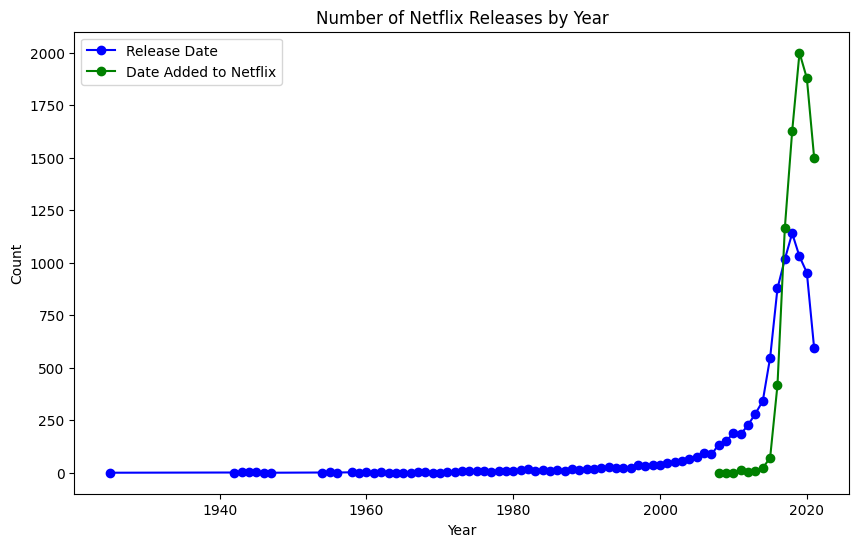

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named netflix_data with "release_year" and "date_added" columns

# Convert the "date_added" column to datetime format with error handling
netflix_data["date_added"] = pd.to_datetime(netflix_data["date_added"], errors='coerce')

# Group the data by release year and count the number of releases in each year
release_counts = netflix_data.groupby("release_year")["date_added"].count()

# Group the data by the year when it was added to Netflix and count the number of additions in each year
added_counts = netflix_data.groupby(netflix_data["date_added"].dt.year)["date_added"].count()

# Create a line plot of the release dates
plt.figure(figsize=(10, 6))
plt.plot(release_counts.index, release_counts.values, marker='o', linestyle='-', color='blue', label="Release Date")

# Create a line plot of the addition dates
plt.plot(added_counts.index, added_counts.values, marker='o', linestyle='-', color='green', label="Date Added to Netflix")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Netflix Releases by Year")

# Adding a legend
plt.legend()

# Displaying the chart
plt.show()

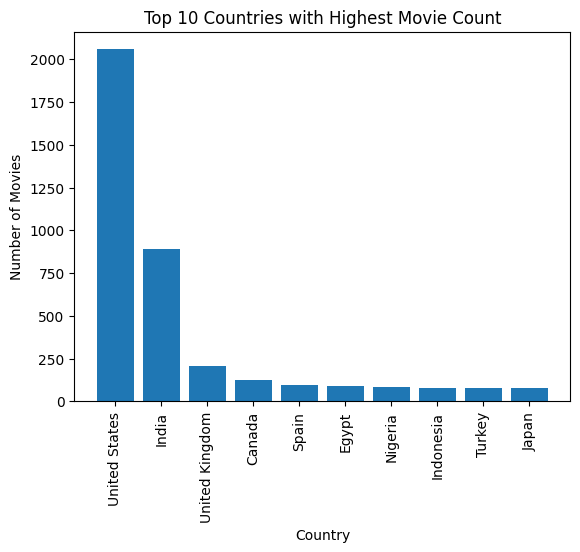

In [19]:
import matplotlib.pyplot as plt

# Filter the dataset to include only movies
movies_data = netflix_data[netflix_data['type'] == 'Movie']

# Specify the number of top countries to consider
top_countries_count = 10

# Get the top N countries with the highest number of movies
top_countries = movies_data['country'].value_counts().head(top_countries_count)

# Plot the bar chart
plt.bar(top_countries.index, top_countries)
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title(f'Top {top_countries_count} Countries with Highest Movie Count')
plt.xticks(rotation=90)
plt.show()

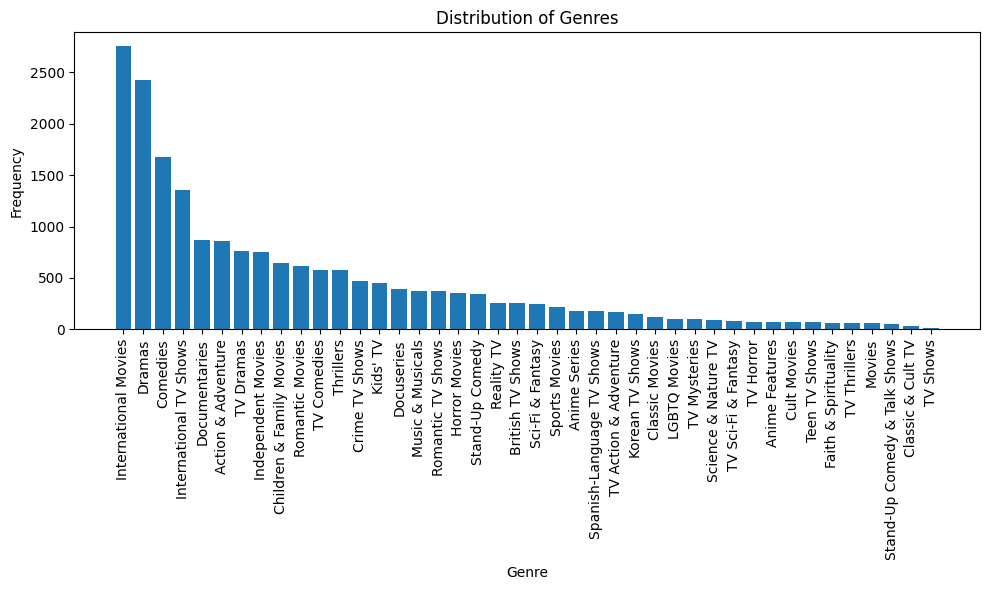

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Split the genres into individual categories
genre_data = netflix_data['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Count the occurrences of each genre
genre_counts = genre_data.value_counts()

# Plot the bar chart with wider bars
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Distribution of Genres')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

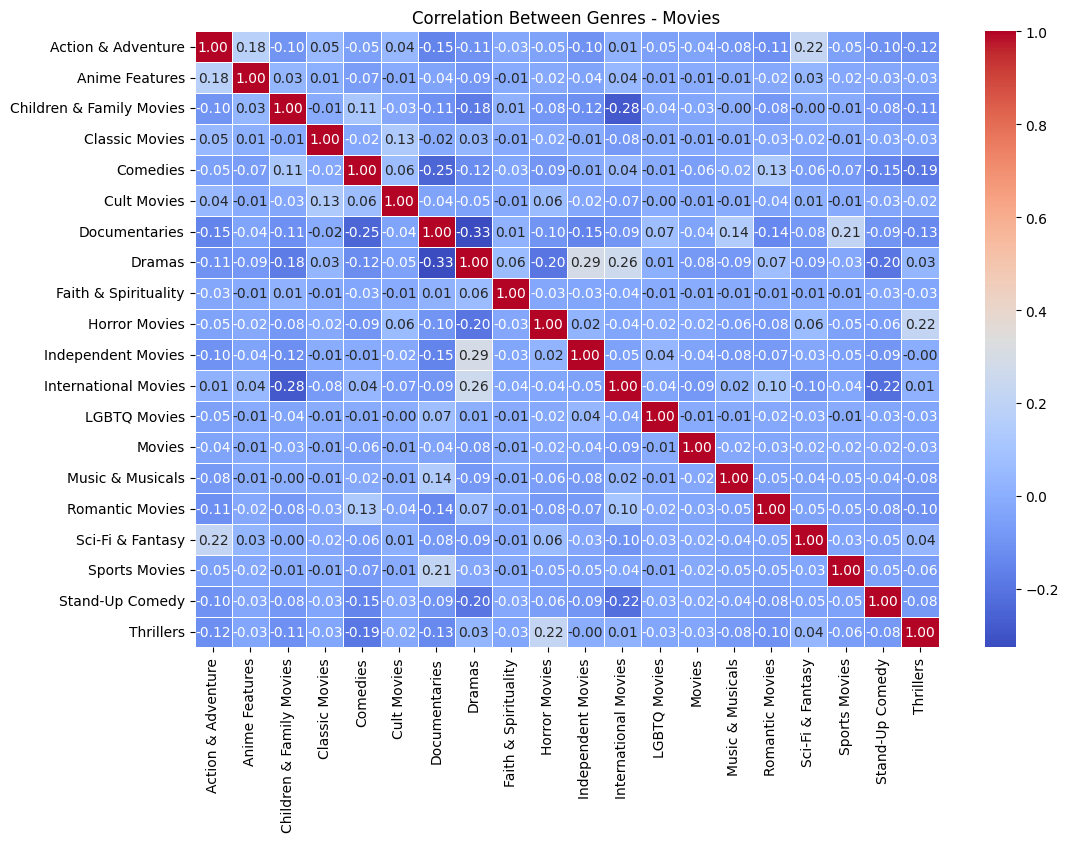

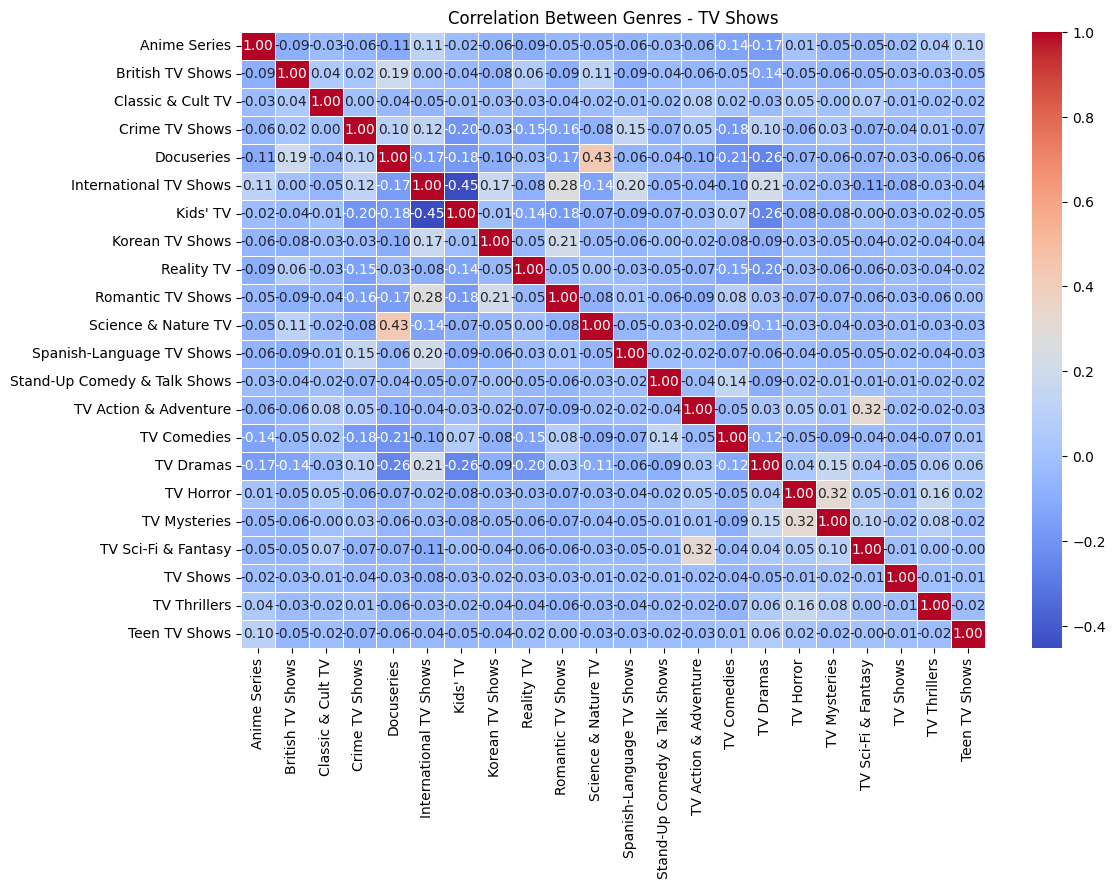

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def genre_heatmap(netflix_data, category):
    # Create a binary matrix of genres
    genre_matrix = netflix_data['listed_in'].str.get_dummies(sep=', ')

    # Calculate the correlation between genres
    genre_correlation = genre_matrix.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(genre_correlation, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Between Genres - {category}')

df_movies = netflix_data[netflix_data["type"] == "Movie"]
genre_heatmap(df_movies, 'Movies')
plt.show()

df_tv = netflix_data[netflix_data["type"] == "TV Show"]
genre_heatmap(df_tv, 'TV Shows')
plt.show()